Price elasticity of demand (PE) is a measure that calculates how much of a good is affected by a change in the price of that good. As discussed above, this measure provides quantitative information about consumer behavior when prices change. Generally, the price elasticity of demand is negative following the law of demand (inverse relationship between price and quantity demanded of a good), excluding some luxury or necessity goods that may have a positive elasticity. 

The calculation is made as the quotient between the percentage change in quantity demanded and the percentage change in price.

EP = 𝛽 = (Δ % Quantity) / (Δ % Price) = (ΔQ/Q) / (ΔP/P) = (ΔQ/Q) * (P/ΔP) = (ΔQ/ΔP) * (P/Q)

let’s imagine that increasing the price by 3% decreases the quantity purchased by 1%, then the elasticity we have in this case would be -3

0 => 𝛽 => -1: Demand is said to be inelastic since the quantity demanded is slightly affected by the change in price.
𝛽 = -1: Demand is said to be unitary since the quantity demanded is affected proportionally to the change in price.
𝛽 <= -1: Demand is said to be elastic since the quantity demanded is affected considerably by the change in price.

In economics, the relationship between price (𝑃) and quantity demanded (𝑄) often follows a multiplicative form, especially when dealing with price elasticity of demand:

𝑄 = 𝐴 * 𝑃^𝛽 

using the logarithmic properties:

ln(𝑄) = ln⁡(𝐴) + 𝛽 x ln⁡(𝑃)   <--> 𝑌 = 𝛼 + 𝛽𝑋

In [13]:
import pandas as pd
import numpy as np
import matplotlib

import statsmodels.api as sm

In [2]:
avocado = pd.read_csv('avocado.csv')
avocado

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [5]:
avocado.type.value_counts()

type
conventional    9126
organic         9123
Name: count, dtype: int64

In [6]:
avocado.region.value_counts()

region
Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago              

Since the purpose of this section is simply to illustrate a simple and straightforward example of how to estimate the price elasticity of demand with a Python data set, we will select the records corresponding to the state of California and conventional avocados. In addition, let’s see with a scatter plot how is the relationship between quantity demanded and prices.

In [8]:
sample = avocado[(avocado.region=='California') & (avocado.type=='conventional')][['AveragePrice', 'Total Volume']]
sample

,AveragePrice,Total Volume
312,0.90,5040365.47
313,0.94,4695737.21
314,0.87,5259354.30
315,0.78,5775536.27
316,0.91,4575710.62
...,...,...
8557,0.80,10894677.77
8558,1.16,6134040.58
8559,1.12,6610010.64
8560,1.27,5927016.73


In [10]:
sample['LogPrice'] = np.log(sample['AveragePrice'])
sample['LogQuantity'] = np.log(sample['Total Volume'])
sample

,AveragePrice,Total Volume,LogPrice,LogQuantity
312,0.90,5040365.47,-0.105361,15.432989
313,0.94,4695737.21,-0.061875,15.362166
314,0.87,5259354.30,-0.139262,15.475519
315,0.78,5775536.27,-0.248461,15.569142
316,0.91,4575710.62,-0.094311,15.336273
...,...,...,...,...
8557,0.80,10894677.77,-0.223144,16.203785
8558,1.16,6134040.58,0.148420,15.629364
8559,1.12,6610010.64,0.113329,15.704096
8560,1.27,5927016.73,0.239017,15.595032


<Axes: xlabel='LogPrice', ylabel='LogQuantity'>

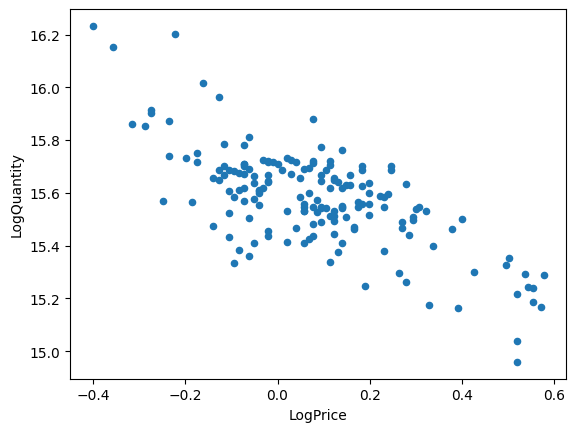

In [11]:
sample.plot.scatter(x='LogPrice', y='LogQuantity')

We can see an inverse relationship between the relative change in price and the relative change in quantity demanded, which indicates that the price elasticity of demand has a negative value. To estimate the elasticity we will use the log-log model, as mentioned above, and the estimated coefficient of the explanatory variable LogPrice is the price elasticity of demand 𝛽:

ln(𝑄) = ln⁡(𝐴) + 𝛽 x ln⁡(𝑃) <--> 𝑌 = 𝛼 + 𝛽𝑋

In [14]:
X = sm.add_constant(sample.LogPrice)
X

# Adding the constant allows the model to estimate the intercept 𝛼, 
# but the actual value of the intercept is determined during the model fitting process.

,const,LogPrice
312,1.0,-0.105361
313,1.0,-0.061875
314,1.0,-0.139262
315,1.0,-0.248461
316,1.0,-0.094311
...,...,...
8557,1.0,-0.223144
8558,1.0,0.148420
8559,1.0,0.113329
8560,1.0,0.239017


In [16]:
y = sample.LogQuantity
y

312     15.432989
313     15.362166
314     15.475519
315     15.569142
316     15.336273
          ...    
8557    16.203785
8558    15.629364
8559    15.704096
8560    15.595032
8561    15.565863
Name: LogQuantity, Length: 169, dtype: float64

Recommendation:

OLS: If you are analyzing historical data to estimate price elasticity of demand and the relationship between price and quantity is assumed to be stable, OLS is a solid choice.

RLS: If you expect the relationship between price and quantity to evolve over time and need a model that can adapt to these changes, RLS would be more appropriate.

In [17]:
model = sm.OLS(y, X).fit()
model

In [20]:
model.params

const       15.633763
LogPrice    -0.681382
dtype: float64

In [19]:
model.params['LogPrice']

#  a 1% increase in price has an impact on demand so that it falls by 0.6814%. 
# It is an inelastic demand and, therefore, a change in price slightly affects the quantity demanded.

-0.6813823667546594